# CS 109A/AC 209A/STAT 121A Data Science: Homework 3
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 28th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW3.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [44]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import statsmodels.api as sm
import scipy as sp
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Hagmann, Tim]

### Part (b): Course Number

[CS 109a]

### Part (c): Who did you work with?

-

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Multiple linear regression

### Part (a): Implement multiple linear regression from scratch

You are provided a data set containing attributes related to automobiles as well as their corresponding prices. The task is to build a linear regression model from scratch that can estimate the price of an automobile (response variable) using its attributes (predictor variables).

The file ``dataset_1_train.txt`` contains the training set that you can use to fit a regression model, and the file ``dataset_1_test.txt`` contains the test set that you can use to evaluate the model. In each file, the first two columns contain the predictors of the automobile, namely ``'horsepower'`` and ``'highway MPG'``, and the last column contains the automobile prices.

- Implement the following two functions from scratch. 

    - ``multiple_linear_regression_fit``:

        - takes as input: the training set, ``x_train``, ``y_train``

        - fits a multiple linear regression model

        - returns the model parameters (coefficients on the predictors, as an array, and the intercept, as a float).

    - ``multiple_linear_regression_score``:

        - takes model parameters (coefficients and intercept) and the test set, ``x_test`` ``y_test``, as inputs

        - returns the R^2 score for the model on the test set, along with the predicted y-values.
        
- Use your functions to predict automobile prices and evaluate your predictions.

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

In [2]:
## Functions
#-----------
### Functions for fitting and evaluating multiple linear regression

#--------  multiple_linear_regression_fit
# A function for fitting a multiple linear regression
# Fitted model: f(x) = x.w + c
# Input: 
#      x_train (n x d array of predictors in training data)
#      y_train (n x 1 array of response variable vals in training data)
# Return: 
#      w (d x 1 array of coefficients) 
#      c (float representing intercept)

def multiple_linear_regression_fit(x_train, y_train):
    
    # Append a column of one's to x
    n = x_train.shape[0]
    ones_col = np.ones((n, 1))
    
    x_train = np.concatenate((x_train, ones_col), axis=1)
    
    # Compute transpose of x
    x_transpose = np.transpose(x_train)
    
    # Compute coefficients: w = inv(x^T * x) x^T *y
    # Compute intermediate term: inv(x^T * x)
    # Note: We have to take pseudo-inverse (pinv), just in case x^T
    x_t_x_inv = np.linalg.pinv(np.dot(x_transpose, x_train))
    
    # Compute w: inter_term * x^T * y
    w = np.dot(np.dot(x_t_x_inv, x_transpose), y_train)
    
    # Obtain intercept: 'c' (last index)
    c = w[-1]
    
    return w[:-1], c

#------- multiple_linear_regression_score
# A fucntion for evaluation R^2 score and MSE
# of the linear regression model on a data set
# Input: 
#      w (d x 1 array of coefficients)
#      c (float representing intercept)
#      x_test (n x d array of predictors in testing data)
#      y_test (n x 1 array of response variable vals in testing data)
# Return:
#       r_squared (float)
#       y_pred (n x 1 array of predicted y_vias)

def multiple_linear_regression_score(w, c, x_test, y_test):
    # Compute predicted labels
    y_pred = np.dot(x_test, w) + c
    
    # Evaluate squared error, agains target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = np.sum(np.square(y_test - y_pred))
    
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean) ^2
    
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_squared = 1- sq_error / y_variance
    
    return r_squared, y_pred


In [3]:
# Load train and test data
data_train = np.loadtxt('datasets/dataset_1_train.txt', delimiter=",", skiprows=1)
data_test = np.loadtxt('datasets/dataset_1_test.txt', delimiter=",", skiprows=1)

# Split predictors from sepsonses
# Training
y_train = data_train[:, -1]
x_train = data_train[:, :-1]

# Testing
y_test = data_test[:, -1]
x_test = data_test[:, :-1]

# Fit multiple linear regression model
w, c = multiple_linear_regression_fit(x_train, y_train)

# Evaluate model
r_squared, _ = multiple_linear_regression_score(w, c, x_test, y_test)

print 'R^2 score on test set:', r_squared

R^2 score on test set: 0.177944627327


### Part (b): Confidence interval on regression parameters
Using your linear regression implementation from Part (a), model the data in ``dataset_2.txt``, which contains five predictor variables in the first five columns, and the response variable in the last column.

Compute confidence intervals for the model parameters you obtain:

- Create 200 random subsamples of the data set of size 100, and use your function to fit a multiple linear regression model to each subsample. 

- For each coefficient on the predictor variables: plot a histogram of the values obtained across the subsamples, and calculate the confidence interval for the coefficients at a confidence level of 95%. 

- Highlight the mean coeffcient values and the end points of the confidence intervals using vertical lines on the histogram plot. How large is the spread of the coefficient values in the histograms, and how tight are the confidence intervals?

- Use the formula for computing confidence intervals provided in class (or use ``statmodels``) to compute the the confidence intervals. Compare confidence intervals you find through simulation to the ones given by the formula (or ``statmodels``), are your results what you would expect?

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

In [4]:
### Data

# Load training set
data = np.loadtxt("datasets/dataset_2.txt", delimiter=',', skiprows = 1)

# Size of data set, and subsample (10%)
x = data[:, :-1]
y = data[:, -1]

# Record size of the data set
n = x.shape[0]
d = x.shape[1]
subsample_size = 100


In [5]:
### Linear regression with all 5 predictors

# No. of subsamples
num_samples = 200
np.random.seed(123) # Set seed
    
# Create a n x d array to store coefficients for 100 subsamples
coefs_multiple = np.zeros((num_samples, d))

# Repeat for 200 subsamples
for i in range(num_samples):
    # Generate a random subsample of 50 data points
    perm = np.random.permutation(n) # Generate a list of indices 0 to n and permute it
    x_subsample = x[perm[:subsample_size], :] # Get x-vals for the first 50 indices in permuted list
    
    y_subsample = y[perm[:subsample_size]] # Get y-vals for the first 50 indices in permuted list

    # Fit linear regression model on subsample
    w, c = multiple_linear_regression_fit(x_subsample, y_subsample)
    # Store the coefficient for the model we obtain
    coefs_multiple[i, :] = w

Histogram of coefficients, and report their confidence intervals:


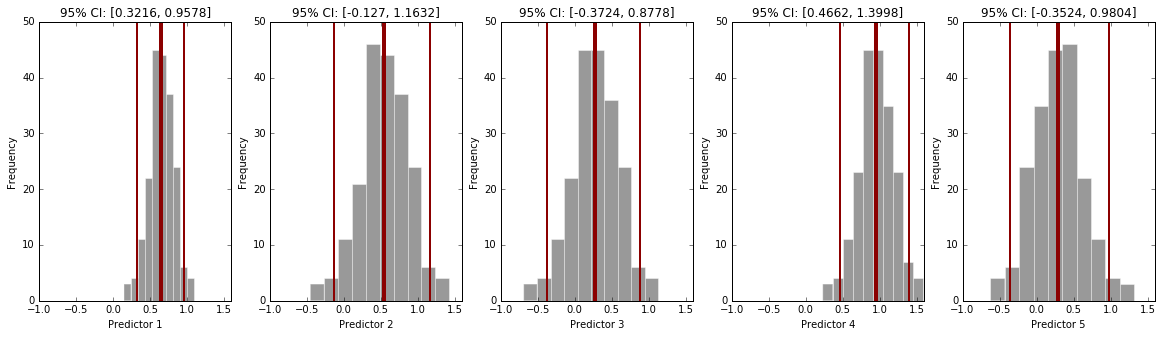

Spread in the coefficiants:
predictor 0  mininmum:  0.149092786222  maximum:  1.09052887182
predictor 1  mininmum:  -0.453283878265  maximum:  1.4243779814
predictor 2  mininmum:  -0.690008994729  maximum:  1.12965198268
predictor 3  mininmum:  0.231101395931  maximum:  1.59078769789
predictor 4  mininmum:  -0.621610474504  maximum:  1.31886553334


In [6]:
### Plotting

# Plot histogram of coefficients, and report their confidence intervals 
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

print "Histogram of coefficients, and report their confidence intervals:"
# Repeat for each coefficient
for j in range(d):
    # Compute mean for the j-th coefficent from subsamples
    coef_j_mean = np.mean(coefs_multiple[:, j])
    
    # Compute confidence interval at 95% confidence level (use formula!)
    conf_int_left = np.percentile(coefs_multiple[:, j], 2.5)
    conf_int_right = np.percentile(coefs_multiple[:, j], 97.5)
    
    # Set axes limits
    axes[j].set_xlim([-1, 1.6])
    axes[j].set_ylim([0, 50])

    # Plot histogram of coefficient values
    axes[j].hist(coefs_multiple[:, j], alpha=0.4, color="black", edgecolor="white")

    # Plot vertical lines at mean and left, right extremes of confidence interval
    axes[j].axvline(x = coef_j_mean, linewidth=4, color="darkred")
    axes[j].axvline(x = conf_int_left, linewidth=2, color='darkred')
    axes[j].axvline(x = conf_int_right, linewidth=2, color='darkred')
    
    # Set plot labels
    axes[j].set_title('95% CI: [' + str(round(conf_int_left, 4)) 
                      + ', ' 
                      + str(round(conf_int_right, 4)) + ']')
    axes[j].set_xlabel('Predictor ' + str(j + 1))
    axes[j].set_ylabel('Frequency')

plt.show()

## Show the spread in the coeficiants
print "Spread in the coefficiants:" 
for i in range(d):
    print "predictor", i, " mininmum: ", min(coefs_multiple[:, i]), " maximum: ", max(coefs_multiple[:, i])

 <span style="color:darkblue">
** Comment: ** <br>
As can be seen, only predictor 1 and 4 are significanlty different from zero. Predictor 1 and 4 have fairly tight confidence intervals, i.e., we can be more confident that there population value is closer to the estimate. 
</span>

In [7]:
### Compare confidance intervalls
# Add column of ones to x matrix
x = sm.add_constant(x)

# Create model for linear regression
model = sm.OLS(y, x)

# Fit model
fitted_model = model.fit()

# The confidence intervals for our five coefficients are contained in the last five
# rows of the fitted_model.conf_int() array
conf_int = fitted_model.conf_int()[1:, :]

for j in range(d):
    print 'The 95% confidence interval for the', j+1, 'th predictor: [', conf_int[j][0], ',', conf_int[j][1], ']'



The 95% confidence interval for the 1 th predictor: [ 0.552772624516 , 0.75038508161 ]
The 95% confidence interval for the 2 th predictor: [ 0.352230409656 , 0.749743369436 ]
The 95% confidence interval for the 3 th predictor: [ 0.0889138463556 , 0.47338926001 ]
The 95% confidence interval for the 4 th predictor: [ 0.809809940402 , 1.09854837094 ]
The 95% confidence interval for the 5 th predictor: [ 0.0785426153803 , 0.488433606409 ]


 <span style="color:darkblue">
** Comment: ** <br>
The confidence intervalls don't correspont with the one from the calculation. Here all values are significantly different from zero. It appears that the sample size is too small. We might get a closer result with a larger sample size.
</span>

## Problem 2: Polynomial regression
In this problem, we revisit a dataset from Homework 1 and fit polynomial regression models to it. The dataset is provided in the file ``dataset_3.txt``, which contains a single predictor variable ``x`` in the first column and the response variable ``y`` in the second column. 

### Part(a): Implement polynomial regression from scratch

- Implement the following three functions from scratch:

    - ``polynomial_regression_fit``:
        - takes as input: training set, ``x_train``, ``y_train`` and the degree of the polynomial
        - fits a polynomial regression model 
        - returns the model parameters (array of coefficients and the intercept)

    - ``polynomial_regression_predict``: 
        - takes as input: the model parameters (array of coefficients and the intercept), the degree of the polynomial and the test set predictors ``x_test``
        - returns the response values predicted by the model on the test set. 

    - ``polynomial_regression_score``: 
        - takes an array of predicted response values and the array of true response values ``y_test``
        - returns R^2 score for the model on the test set, as well as the sum of squared errors

- Fit polynomial regression models of degrees 3, 5, 10 and 25 to the data set. Visualize the original data along with the fitted models for the various degrees in the same plot. 

For this problem, you may either use the multiple linear regression functions implemented in the Problem 1 or use the in-built functions in ``sklearn``.

# Polynomial Regression

$$y_i =β0 +β_1x_i +β_2x^2_i +β_3x^3_i +...+β_d x^d_i +ε_i$$




In [8]:
#--------  split
# A function to split a dataset into a training and a test set
# Input:
#       data (np array)
#       split (value between [0, 1])
# Return:
#       train (np array),
#       test (np array)

def split(data, split):
    #find the number of records dataframe
    length = data.shape[0]
    #build a list of integer indices for records in dataframe
    indices = range(length)
    #randomly shuffle the indices
    np.random.shuffle(indices)
    
    #take 70% of the shuffled list of indices for training
    train_indices = indices[0:int(length * split)]
    #take the remainder the shuffled list of indices for testing
    test_indices = indices[int(length * split):]
    
    #get the records for the training indices
    train = data[train_indices, :]
    #get the records for the testing indices
    test = data[test_indices, :]
    
    return train, test

#--------  polynomial_regression_fit
# A function for fitting a polynomial_regression_fit regression
# Input: 
#      x (n x d array of predictors)
#      y (n x 1 array of response variable)
#      degrees (number of polynomial degrees)
# Return: 
#      model_results (object)
#      Xt (np array)

def polynomial_regression_fit(x, y, degrees):
    # Create the poly terms for x,x^2 .. 
    
    n= np.size(y)   # data size 
    x_poly = np.zeros([n, degrees]) # poly degree 

    for d in range(1, degrees +1):
        x_poly[:, d - 1] = np.power(x, d)  # adding terms 

    Xt=sm.add_constant(x_poly)
    model=sm.OLS(y, Xt)
    model_results=model.fit()
    return model_results, Xt

#--------  polynomial_regression_predict
# A function to calculate the prediction of a polynomial regression
# Input: 
#      params (n x 1 array of the model parameters)
#      degrees (n x 1 array of the polynomial degrees)
#      x (n x 1 array of the x's)
# Return:
#       y_pred (float)
def polynomial_regression_predict(params, degrees, x):
    # # Create the poly terms for x,x^2 ..
    n = x.shape[0]
    x_poly = np.zeros([n, degrees])
    for d in range(1, degrees + 1):
        x_poly[:, d - 1] = np.power(x, d)
    Xt=sm.add_constant(x_poly)
   
    # Predict y-vals
    y_pred = np.dot(params,Xt.T)
        
    return y_pred

#------- polynomial_regression_score
# A function for evaluation R^2 score and the sum of squared errors
# of the linear regression model on a data set
# Input: 
#      y_test (n x 1 array of response variable vals in testing data)
#      y_pred (n x 1 array of predicted y variable)
# Return:
#       r_squared (float)
#       sq_error (n x 1 array of the sum of squared errors)

def polynomial_regression_score(y_test, y_pred):
    
    # Evaluate squared error, agains target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = np.sum(np.square(y_test - y_pred))
    
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean) ^2
    
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_squared = 1- sq_error / y_variance
    
    return r_squared, sq_error


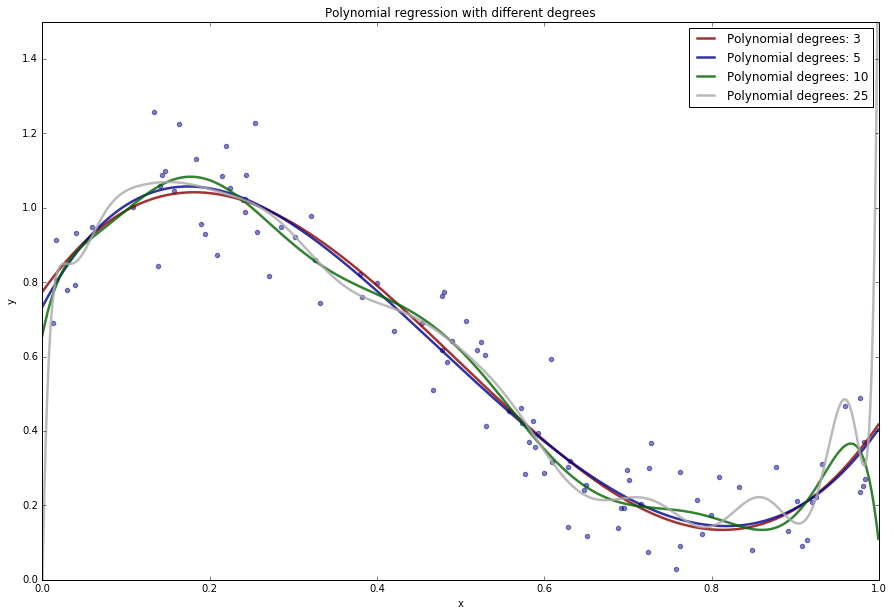

In [9]:
# Load training set
data = np.loadtxt("datasets/dataset_3.txt", delimiter=',', skiprows = 1)

# Extract variables
x = data[:, 0]
y = data[:, 1]

# Vector with the degrees of freedom
degrees = [3, 5, 10, 25]
colors = ["darkred", "darkblue", "darkgreen", "darkgrey"]
# Simulate x values
x_sim = np.arange(0, 1, 0.001)

# Plot the data
plt.figure(figsize=(15,10))
plt.scatter(x, y, color = "darkblue", alpha = 0.5)
plt.xlim(0, 1)
plt.ylim(0, 1.5)
plt.title('Polynomial regression with different degrees')
plt.xlabel('x'); plt.ylabel('y')

# Add different models
# Get regression fit
for i in range(0, 4):
    model_results, x_poly = polynomial_regression_fit(x, y, degrees[i])
    y_hat = np.dot(model_results.params, x_poly.T)
    y_sim = polynomial_regression_predict(model_results.params, degrees[i], x_sim)
    plt.plot(x_sim, y_sim, 'b', color = colors[i], alpha = 0.8, linewidth=2.5, label="Polynomial degrees: " + str(degrees[i]))

# Add legend
plt.legend()


###  Part (b): Comparing training and test errors

- Split the data set in Problem 2 each into training and test sets: use the first 50% of the data for training and the remaining for testing. 


- Fit polynomial models of varying degree ranging from 1 to 15 to the training sets. Evaluate  the various fits on **both** the training and the test sets. Plot both the R^2 score of the fitted polynomial models on the training and test sets as a functions of the degree. 


- Describe the relationship between degree of the polynomial model and the fit on both the training and testing data. Explain, based on the plot, what is the best polynomial model for the data.

In [484]:
### Data
# Create train and test data
np.random.seed(123) # Set seed
train, test = split(data, 0.5)

# Extract variables
x_train = train[:, 0]
y_train = train[:, 1]
x_test = test[:, 0]
y_test = test[:, 1]


[ 0.074964  0.97855   0.6184    0.22167   0.29482   0.91325   0.27228
  0.28685   0.4279    1.2247    0.39336   1.2569    0.37174   0.30402
  0.81714   0.64098   0.030316  0.93099  -0.008473  0.69627   0.25187
  1.0594    0.74293   0.85856   0.66792   0.46251   0.93484   0.98807
  0.1395    0.4121    0.75929   0.19235   1.1652    1.0997    0.45458
  1.2268    0.87333   0.30067   0.79861   0.69141   1.0872    0.78036
  0.28938   0.17337   0.36886   0.76368   0.59353   1.0543    0.10798
  0.80712 ]


In [11]:
# Calculations
degrees = 15
R2_test = np.zeros([degrees + 1, 1])
R2 = np.zeros([degrees + 1, 1])
AIC = np.zeros([degrees + 1, 1])
BIC = np.zeros([degrees + 1, 1])

for d in range(1, degrees + 1):
    model_results, _ = polynomial_regression_fit(x_train, y_train, d)
    R2[d] = model_results.rsquared
    y_hat = polynomial_regression_predict(model_results.params, d, x_test)
    RSS = np.sum((y_test - y_hat)**2)
    TSS = np.sum((y_test - np.mean(y_test))**2)
    R2_test[d] = 1.0 - (RSS/TSS)
    AIC[d] = model_results.aic
    BIC[d] = model_results.bic


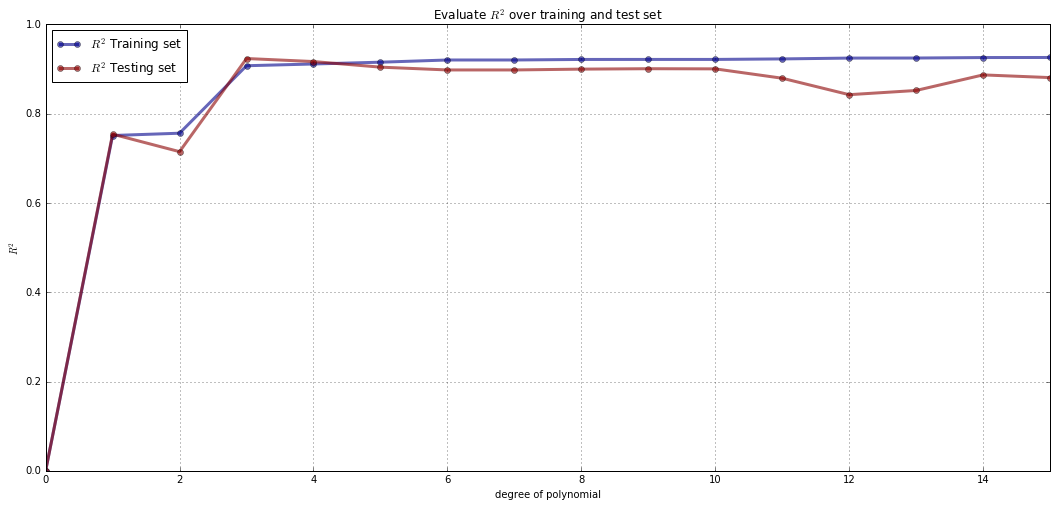

In [12]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(R2, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(R2_test, 'ro-', label=r'$R^2$ Testing set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('degree of polynomial'); plt.ylabel(r'$R^2$')
plt.xlabel('degree of polynomial'); plt.ylabel(r'$R^2$')
plt.xlim(0, 15)
plt.title(r'Evaluate $R^2$ over training and test set')
plt.legend(loc='best')
plt.grid()

## Problem 3: Model selection criterion
In this problem, we examine various criteria that help us decide how to choose between multiple models for the same data.

###  Part (a): How does one choose the best polynomial degree?
In Problem 2, you fitted polynomials of different degrees to the entire data set, and inspected the quality of fits on the test set. In practice, one needs to find the 'best' model for the given prediction task using **only** the training set. For this, we'll now make use of two model selection criteria, namely, the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These are evaluated on the training set, but serve as a proxy for the test set accuracy.

For ``dataset_3.txt``, do the following:

- For each polynomial model you fitted, compute the AIC and BIC for the model on the training set. Plot the criterion values as a function of the polynomial degree.


- Which model is chosen by each criterion? Do they match with the model that yields maximum test R^2 score?

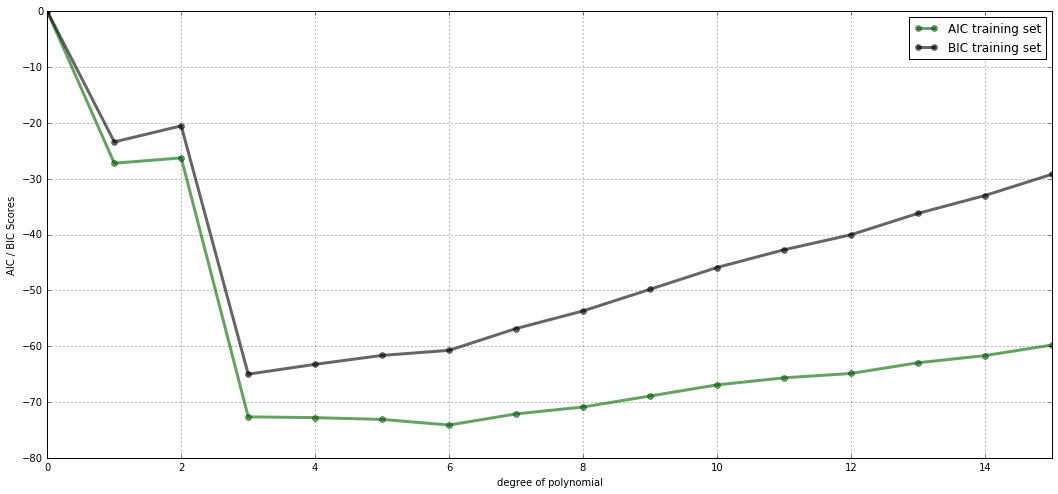

In [13]:
# Plot the AIC and BIC
plt.figure(figsize=(18, 8))
plt.plot(AIC[0:17], 'bo-', label=r'AIC training set', color="darkgreen", alpha=0.6, linewidth=3)
plt.plot(BIC[0:17], 'ro-', label=r'BIC training set', color="black", alpha=0.6, linewidth=3)

plt.xlabel('degree of polynomial'); plt.ylabel('AIC / BIC Scores')
plt.xlabel('degree of polynomial'); plt.ylabel('AIC / BIC Scores')
plt.xlim(0, 15)
plt.legend(loc='best')
plt.grid()

 <span style="color:darkblue">
** Comment: ** <br>
The AIC and BIC are both quantities that take the log likelihood and apply a penalty to it for the number of parameters being estimated. For model comparison, the model with the lowest AIC / BIC score is preferred. In this example the model with 3 degrees of freedom has the lowes AIC/BIC score. This also corresponds with the R^2 value where the model with 3 degrees of freedom performes best on the training set, i.e., explaines the most amount of variation in y.
</span>


### Part (b): Application to New York taxi cab density estimation

We shall now apply the concepts learned so far to a real-world prediction task. You are asked to build a regression model for estimating the density of Green cab taxis at any given time of a day in New York city. The model needs to take the time of the day (in minutes) as input, and predict the expected number of pick ups at that time.


The data set for this problem can be downloaded from the following URL: https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv. The file contains the details of all pickups by Green cabs in New York City during January 2015. 

In [344]:
# Load data
data_taxi = pd.read_csv("datasets/green_tripdata_2015-01.csv", header=None, skiprows=1) 

In [457]:
# Transform to date
data_taxi[1] = pd.to_datetime(pd.Series(data_taxi[1]))

# Cleanup (remove zero customers)
data_taxi = data_taxi.iloc[data_taxi[9].values > 0, :]

# Get time
hour = data_taxi[1].dt.hour.values * 60
minute = data_taxi[1].dt.minute.values
sec = data_taxi[1].dt.second.values / 60
data_taxi[23] = hour + minute + sec


In [502]:
# Split dataframe
data_tx = np.array([data_taxi[9].values, data_taxi[23].values])
data_tx = np.transpose(data_tx)

np.random.seed(123) # Set seed
train, test = split(data_tx, 0.5)

# Count numbers
train = pd.DataFrame(pd.DataFrame(train).groupby(1).size())
train[1] = pd.Series(train.index.values)
test = pd.DataFrame(pd.DataFrame(test).groupby(1).size())
test[1] = pd.Series(test.index.values)

# Extract variables
x_train = np.array(train)[1:, 1]
y_train = np.array(train)[1:, 0]
x_test = np.array(test)[1:, 1]
y_test = np.array(test)[1:, 0]


(0, 1440)

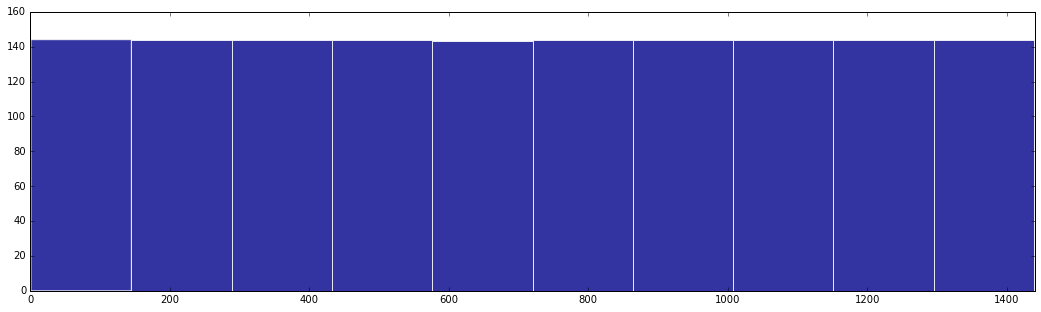

In [513]:
# Plotting
plt.figure(figsize=(18, 5))
plt.hist(x_train, color="darkblue", alpha = 0.8, edgecolor="white")
plt.xlim(0, 1440)

(array([ 116.,   76.,  114.,  102.,  345.,  139.,  176.,  186.,  130.,   55.]),
 array([ 112. ,  193.2,  274.4,  355.6,  436.8,  518. ,  599.2,  680.4,
         761.6,  842.8,  924. ]),
 <a list of 10 Patch objects>)

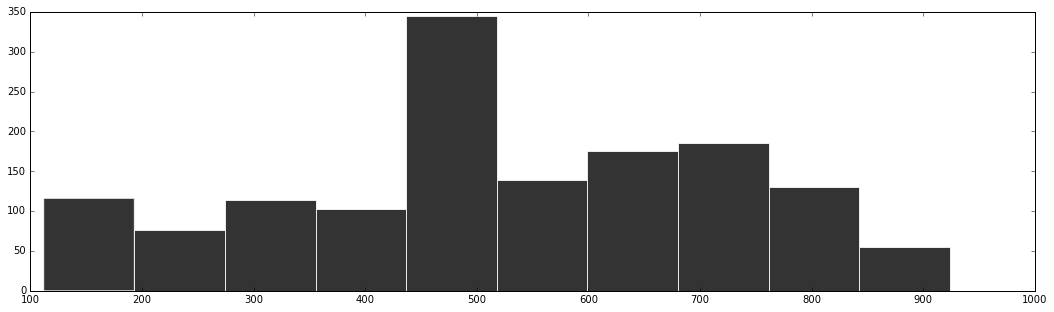

In [514]:
# Plotting
plt.figure(figsize=(18, 5))
plt.hist(y_train, color="black", alpha = 0.8, edgecolor="white")


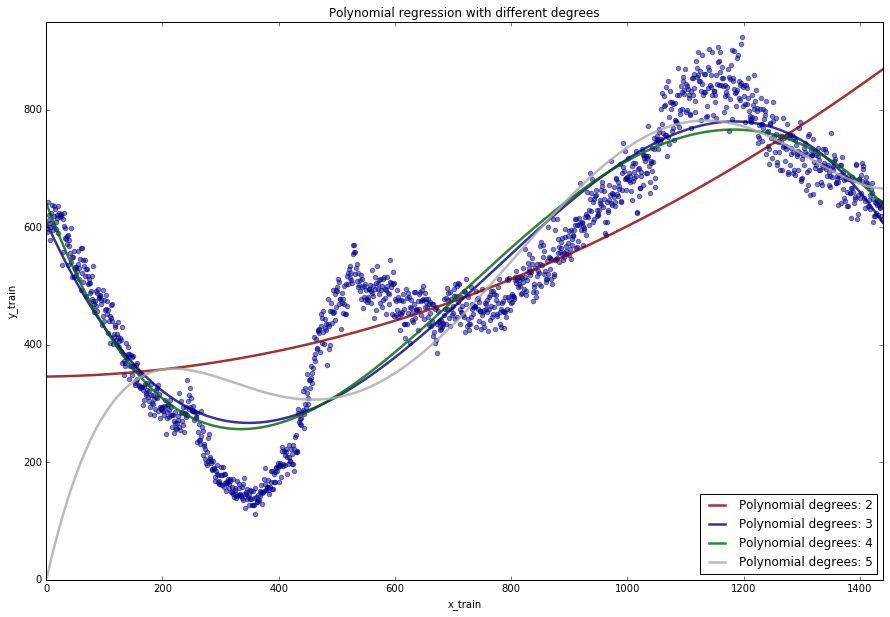

In [537]:
# Vector with the degrees of freedom
degrees = [2, 3, 4, 5]
colors = ["darkred", "darkblue", "darkgreen", "darkgrey"]
# Simulate x values
x_sim = np.arange(0, 1440, 1)

# Plot the data
plt.figure(figsize=(15,10))
plt.scatter(x_train, y_train, color = "darkblue", alpha = 0.5)
plt.xlim(0, 1440)
plt.ylim(0, 950)
plt.title('Polynomial regression with different degrees')
plt.xlabel('x_train'); plt.ylabel('y_train')

# Add different models
# Get regression fit
for i in range(0, 4):
    model_results, x_poly = polynomial_regression_fit(x_train, y_train, degrees[i])
    y_hat = np.dot(model_results.params, x_poly.T)
    y_sim = polynomial_regression_predict(model_results.params, degrees[i], x_train)
    plt.plot(x_train, y_sim, 'b', color = colors[i], alpha = 0.8, linewidth=2.5, label="Polynomial degrees: " + str(degrees[i]))

# Add legend
plt.legend(loc='lower right')

 <span style="color:darkblue">
** Comment: ** <br>
It appears that a polynomial of the 4 degree is the best fit of the data. Concerning the data, it appears that the lowest density of cabs is at around 6 a.m. while the highest is at around 7 p.m.
</span>


In [522]:
# Calculations
degrees = 15
R2_test = np.zeros([degrees + 1, 1])
R2 = np.zeros([degrees + 1, 1])
AIC = np.zeros([degrees + 1, 1])
BIC = np.zeros([degrees + 1, 1])

for d in range(1, degrees + 1):
    model_results, _ = polynomial_regression_fit(x_train, y_train, d)
    R2[d] = model_results.rsquared
    y_hat = polynomial_regression_predict(model_results.params, d, x_test)
    RSS = np.sum((y_test - y_hat)**2)
    TSS = np.sum((y_test - np.mean(y_test))**2)
    R2_test[d] = 1.0 - (RSS/TSS)
    AIC[d] = model_results.aic
    BIC[d] = model_results.bic


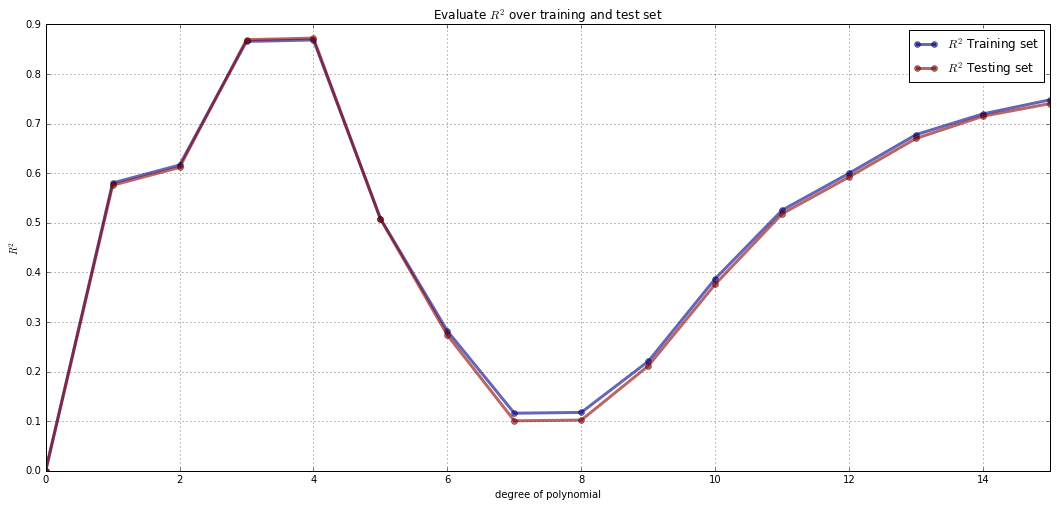

In [523]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(R2, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(R2_test, 'ro-', label=r'$R^2$ Testing set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('degree of polynomial'); plt.ylabel(r'$R^2$')
plt.xlabel('degree of polynomial'); plt.ylabel(r'$R^2$')
plt.xlim(0, 15)
plt.title(r'Evaluate $R^2$ over training and test set')
plt.legend(loc='best')
plt.grid()


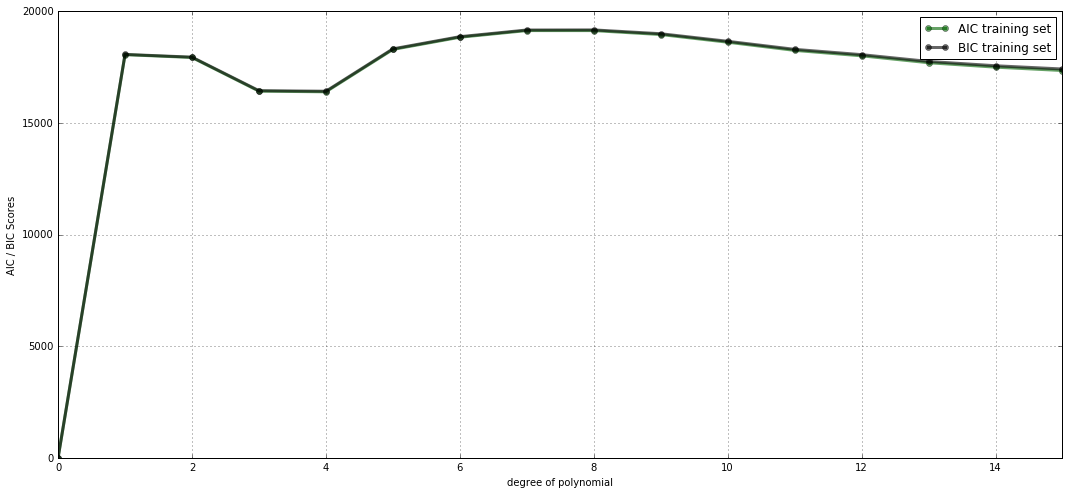

In [524]:
# Plot the AIC and BIC
plt.figure(figsize=(18, 8))
plt.plot(AIC[0:17], 'bo-', label=r'AIC training set', color="darkgreen", alpha=0.6, linewidth=3)
plt.plot(BIC[0:17], 'ro-', label=r'BIC training set', color="black", alpha=0.6, linewidth=3)

plt.xlabel('degree of polynomial'); plt.ylabel('AIC / BIC Scores')
plt.xlabel('degree of polynomial'); plt.ylabel('AIC / BIC Scores')
plt.xlim(0, 15)
plt.legend(loc='best')
plt.grid()

 <span style="color:darkblue">
** Comment: ** <br>
Also the R^2 as well as the AIC / BIC score indicate, that a 4 degree polynomial delievers the best fit
</span>




## Challenge Problem: Advanced regression techniques
In this problem, we revisit the automobile pricing data set in Problem 1(a) and explore advanced regression techniques to build better models. 


### Part (a): Polynomial regression on multi-dimensions
In Problems 2-3, you had implemented a polynomial regression technique for data sets with a single predictor variable. How would you use a similar approach to fit a polynomial model on data sets with more than one predictor?

Reload ``dataset_1_train.txt`` and ``dataset_1_test.txt``. Fit polynomial models of degrees 2 and 3 to the training set, and evaluate the R^2 score of the fitted model on the test set. How do they compare with the test performance of a linear regression model?

### Part (b): Weighted linear regression

Suppose you are told that some of the prices recorded in the training set are noisy, and you are given the list of noisy points, how would you use this information during training to fit a better regression model?

The noise level for each training point is provided in the file dataset_1_train_noise_levels.txt. A noise level 'none' indicates that the price is accurate, and a noise level 'noisy' indicates that the price is only moderately accurate. 

We want to fit a linear regression model that accounts for this new information. One way to do this is to assign different weights to each training point based on the amount of noise associated to that training point. That is, our loss function is now
$$
\sum_{i=1}^n \alpha_i\,(y_i \,-\, w^T x_i)^2
$$
where $\alpha_i$ is a number representing how much you value the contribution of the data point $x_i$.

How does the R^2 score (evaluated on the test set) of the new linear model compare to the one fitted using plain linear regression?